In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt

import time
from datetime import datetime

import tba3102

In [2]:
tba3102.set_default_pandas_options(max_columns=11)

np.random.seed(int(round(time.time())))

In [3]:
df = pd.read_csv('../data/very_cleaned.csv', index_col=0)
tba3102.data_quality_report(df)

,asins,name,brand,categories,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.text_cleaned,reviews.text_very_cleaned
count,34059,27405,34059,34059,34059,34059.0,34059.0,34059,34059,34059,34059
unique,24,44,4,23,2,NaN,NaN,34059,19451,33970,33940
top,B018Y229OU,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",True,NaN,NaN,This product so far has not disappointed. My c...,Great product,good product,great
freq,10965,10961,28120,10965,32675,NaN,NaN,1,643,4,4
mean,NaN,NaN,NaN,NaN,NaN,0.258463,4.589624,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.193926,0.721823,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.0,4.0,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,NaN,NaN


In [4]:
# to allow you to reproduce the same clustering result, you can print out the random value used for the sampling
# random_state = np.random.randint(2**31-1)
random_state = 945649140
print('random_state: {}'.format(random_state))

random_state: 945649140


In [5]:
df = df.sample(frac=0.50, replace=False, random_state=random_state)
df.reset_index(inplace=True)
tba3102.data_quality_report(df)

,index,asins,name,brand,categories,...,reviews.rating,reviews.text,reviews.title,reviews.text_cleaned,reviews.text_very_cleaned
count,17030.0,17030,13688,17030,17030,...,17030.0,17030,17030,17030,17030
unique,NaN,23,37,4,22,...,NaN,17030,10559,17013,17002
top,NaN,B018Y229OU,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",...,NaN,Kids Kindle was a Christmas present for great ...,Great product,purchased this as an upgrade to the first gene...,buy granddaughter absolutely love
freq,NaN,5459,5462,14046,5459,...,NaN,1,317,3,3
mean,17024.97158,NaN,NaN,NaN,NaN,...,4.589841,NaN,NaN,NaN,NaN
std,9827.107758,NaN,NaN,NaN,NaN,...,0.720253,NaN,NaN,NaN,NaN
min,2.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN
25%,8515.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN
50%,17024.0,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN
75%,25508.75,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN


In [6]:
print('Text processing started at {}'.format(datetime.now()))

Text processing started at 2025-02-20 18:27:48.082525


In [7]:
tv = TfidfVectorizer(min_df=0.01, max_df=1.0, norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(df['reviews.text_very_cleaned'])
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names_out()
df_tfidf = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

df_tfidf.to_csv('../data/tfidf.csv')
print('Number of terms extracted is {}'.format(df_tfidf.columns.size))

Number of terms extracted is 261


In [8]:
similarity_matrix = cosine_similarity(tv_matrix)
df_similarity = pd.DataFrame(similarity_matrix)
df_similarity

,0,1,2,3,4,...,17025,17026,17027,17028,17029
0,1.000000,0.032229,0.117480,0.026891,0.143273,...,0.047289,0.103729,0.261805,0.050590,0.084971
1,0.032229,1.000000,0.068423,0.067628,0.064342,...,0.122847,0.304338,0.067005,0.077975,0.060250
2,0.117480,0.068423,1.000000,0.000000,0.000000,...,0.000000,0.047251,0.029561,0.000000,0.000000
3,0.026891,0.067628,0.000000,1.000000,0.170300,...,0.178285,0.058919,0.000000,0.113163,0.050272
4,0.143273,0.064342,0.000000,0.170300,1.000000,...,0.288835,0.216845,0.000000,0.257341,0.091588
...,...,...,...,...,...,...,...,...,...,...,...
17025,0.047289,0.122847,0.000000,0.178285,0.288835,...,1.000000,0.000000,0.000000,0.205562,0.000000
17026,0.103729,0.304338,0.047251,0.058919,0.216845,...,0.000000,1.000000,0.044604,0.035360,0.026522
17027,0.261805,0.067005,0.029561,0.000000,0.000000,...,0.000000,0.044604,1.000000,0.000000,0.000000
17028,0.050590,0.077975,0.000000,0.113163,0.257341,...,0.205562,0.035360,0.000000,1.000000,0.110994


In [9]:
check_pairwise_similarity = True
highest_similarity = 0.0
highest_i = 0
highest_j = 0

stop_index = len(df_similarity) 

if check_pairwise_similarity:
    
    for i in range(len(df_similarity)):
        
        for j in range(df_similarity.columns.size):
            
            if i == j:
                
                break
            
            else:
                
                if df_similarity.loc[i,j] > highest_similarity:
                    
                    highest_similarity = df_similarity.loc[i,j]
                    highest_i = i
                    highest_j = j
                    
                    print('Current highest pairwise document similarity is {} between review {} and review {}'.format(highest_similarity, df.loc[highest_i,'index'], df.loc[highest_j,'index']))
    
    print('Highest pairwise document similarity is {} between review {} and review {}'.format(highest_similarity, df.loc[highest_i,'index'], df.loc[highest_j,'index']))

else:
    
    print('Skipping pairwise similarity checking...')

Current highest pairwise document similarity is 0.032228700258721564 between review 30724 and review 15657
Current highest pairwise document similarity is 0.11748045047375656 between review 24385 and review 15657
Current highest pairwise document similarity is 0.1432727909162675 between review 4551 and review 15657
Current highest pairwise document similarity is 0.1702995609163389 between review 4551 and review 1416
Current highest pairwise document similarity is 0.19502142980459267 between review 914 and review 24385
Current highest pairwise document similarity is 0.20111956666240915 between review 20599 and review 1416
Current highest pairwise document similarity is 0.24917381365042948 between review 6596 and review 24385
Current highest pairwise document similarity is 0.28786721085299066 between review 31621 and review 30724
Current highest pairwise document similarity is 0.4500010956987448 between review 16385 and review 11803
Current highest pairwise document similarity is 0.47397

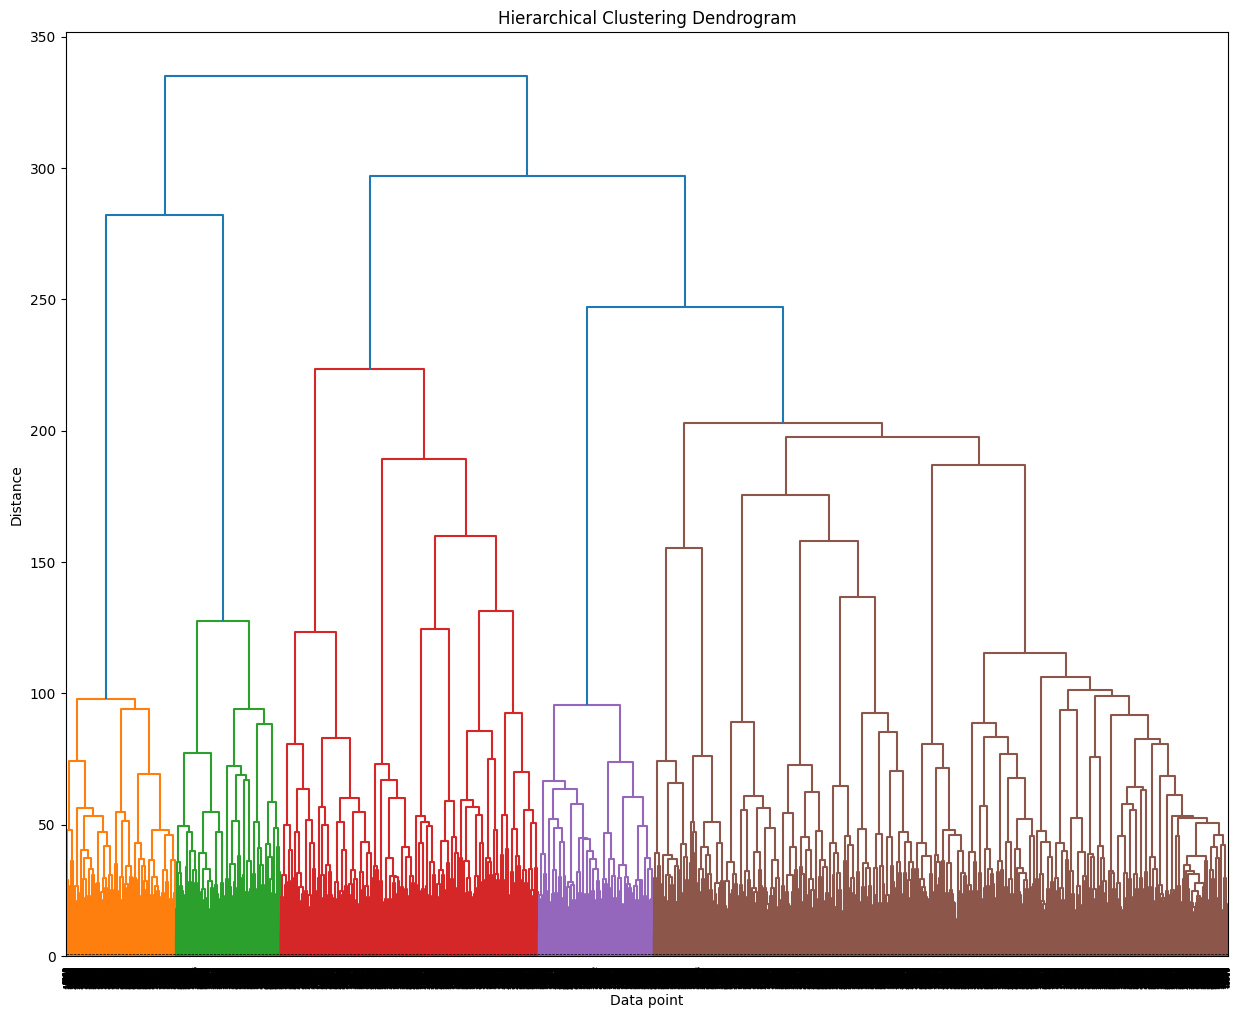

In [10]:
Z = linkage(similarity_matrix, 'ward')

plt.figure(figsize=(15, 12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [11]:
# for random_state = 945649140
max_dist = 230.0
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
df_cluster = pd.concat([df, cluster_labels], axis=1)
df_cluster.to_csv('../data/cluster.csv')

In [12]:
print('Text processing ended at {}'.format(datetime.now()))

Text processing ended at 2025-02-20 19:07:02.298925
